In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

sales_df = pd.read_csv("sales_data.csv")
churn_df = pd.read_csv("customer_churn.csv")

sales_df['Date'] = pd.to_datetime(sales_df['Date'])


In [12]:
desc_stats = sales_df['Total_Sales'].describe()

mean = sales_df['Total_Sales'].mean()
median = sales_df['Total_Sales'].median()
mode = sales_df['Total_Sales'].mode()[0]
std_dev = sales_df['Total_Sales'].std()

print("mean:", mean, "\nmedian:", median, "\nmode:", mode, "\nstd_dev:", std_dev)


mean: 123650.48 
median: 97955.5 
mode: 6540 
std_dev: 100161.08527499212


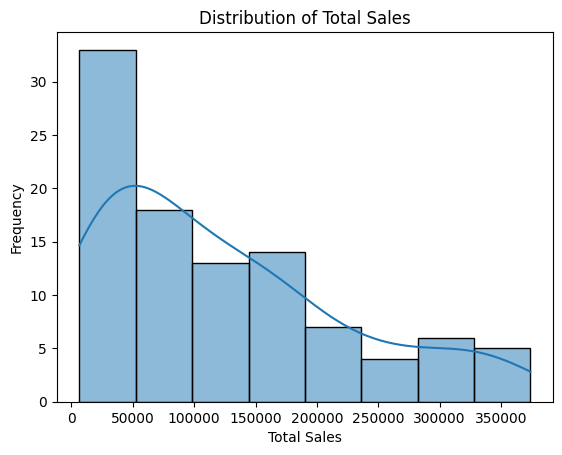

In [3]:
plt.figure()
sns.histplot(sales_df['Total_Sales'], kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


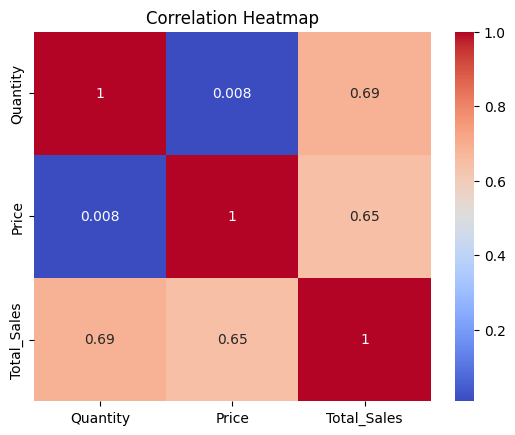

,Quantity,Price,Total_Sales
Quantity,1.000000,0.008014,0.688107
Price,0.008014,1.000000,0.646131
Total_Sales,0.688107,0.646131,1.000000


In [4]:
correlation = sales_df[['Quantity', 'Price', 'Total_Sales']].corr()

plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

correlation


In [17]:
benchmark = 50000

t_stat, p_value = stats.ttest_1samp(sales_df['Total_Sales'], benchmark)

print("t = ",t_stat,"\np = ", p_value)


t =  7.353203072609756 
p =  5.667379489154039e-11


In [6]:
region_a = sales_df[sales_df['Region'] == 'North']['Total_Sales']
region_b = sales_df[sales_df['Region'] == 'South']['Total_Sales']

t_stat_reg, p_val_reg = stats.ttest_ind(region_a, region_b, equal_var=False)

t_stat_reg, p_val_reg


(0.12990909486062338, 0.8971521399586031)

In [7]:
merged_df = pd.merge(
    sales_df,
    churn_df,
    left_on='Customer_ID',
    right_on='CustomerID',
    how='inner'
)

churned = merged_df[merged_df['Churn'] == 1]['Total_Sales']
retained = merged_df[merged_df['Churn'] == 0]['Total_Sales']

t_stat_churn, p_val_churn = stats.ttest_ind(churned, retained, equal_var=False)

t_stat_churn, p_val_churn


C:\Users\IMANUVEL K\AppData\Local\Temp\ipykernel_18576\4117111864.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat_churn, p_val_churn = stats.ttest_ind(churned, retained, equal_var=False)


(nan, nan)

In [8]:
confidence = 0.95
n = len(sales_df['Total_Sales'])
mean_sales = mean
std_error = std_dev / np.sqrt(n)

margin_error = stats.t.ppf((1 + confidence) / 2, n-1) * std_error

lower = mean_sales - margin_error
upper = mean_sales + margin_error

lower, upper


(103776.34767158539, 143524.6123284146)

In [9]:
X = sales_df['Quantity']
y = sales_df['Total_Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     88.13
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.58e-15
Time:                        18:34:28   Log-Likelihood:                -1260.8
No. Observations:                 100   AIC:                             2526.
Df Residuals:                      98   BIC:                             2531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3638.7415   1.54e+04     -0.236      0.814   -3.42e+04    2.69e+04
Quantity    2.663e+04   2836.592      9.388      0.000     2.1e+04    3.23e+04
==============================================================================
Omnibus:                        0.166   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.350
Skew:                          -0.008   Prob(JB):                        0.840
Kurtosis:                       2.711   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# ------------------ FINAL STATISTICAL OUTPUT ------------------

# Mean & confidence interval already calculated earlier
confidence_level = 95

# Correlation value
corr_value = correlation.loc['Quantity', 'Total_Sales']

# Significance label
significance = "✓ SIGNIFICANT" if p_value < 0.05 else "✗ NOT SIGNIFICANT"

# Strength interpretation
if abs(corr_value) >= 0.7:
    strength = "Strong"
elif abs(corr_value) >= 0.4:
    strength = "Moderate"
else:
    strength = "Weak"

print("STATISTICAL ANALYSIS REPORT\n")
print(
    f"Average Sales: ${mean_sales:,.0f} ± ${margin_error:,.0f} "
    f"({confidence_level}% CI)"
)
print(
    f"Correlation (Quantity vs Sales): {corr_value:.2f} ({strength})"
)
print(
    f"Quantity affects sales: p = {p_value:.4f} {significance}"
)


STATISTICAL ANALYSIS REPORT

Average Sales: $123,650 ± $19,874 (95% CI)
Correlation (Quantity vs Sales): 0.69 (Moderate)
Quantity affects sales: p = 0.0000 ✓ SIGNIFICANT
